# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

# Feature Scaling

This model does not have explicit equation for relationship for Dependent Variable Y and Independent Variable X, Therefore we are going to use **Feature Scaling**.

1. Already learnt in DataPreprocessing
2. Applied in whole Matrix of Feature **X**
3. In Previous DataPreprocessing Part we applied Feature Scaling to X and not to Y
    - **Why ?**
        - Because the dependent variable was taking only values 0 or 1
        - range was small (same range)
    - **But**
        - The range is not large *(from 45k to 1mil)*
        - Also ***Note*** that the **Salary** column *dominates* the other column therefore it would have a much higher impact and the other one is neglected by the SVR model

If we dont apply feature scaling the model will not simply work

In [6]:
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


- #### Reshape Y
Because Feature Scaling excepts one unique format in its input when applying fit_transform() method which is a 2D Array

In [8]:
Y = Y.reshape(len(Y),1)
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

We used 2 Standard Scalar class beacause we are scaling both X and Y and we don't want one's SD or mean to be used by the other

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [10]:
print(X)
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Train the SVR Model (Whole Dataset)

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf') # Kernel of SVR and SVM 'Gaussian Radial Basis Funtion (Most Popular)'
regressor.fit(X,Y)

c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting the new Result

- Because we reshapped and transformed Y therefore we use inverse transform

In [13]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualizing the SVR results

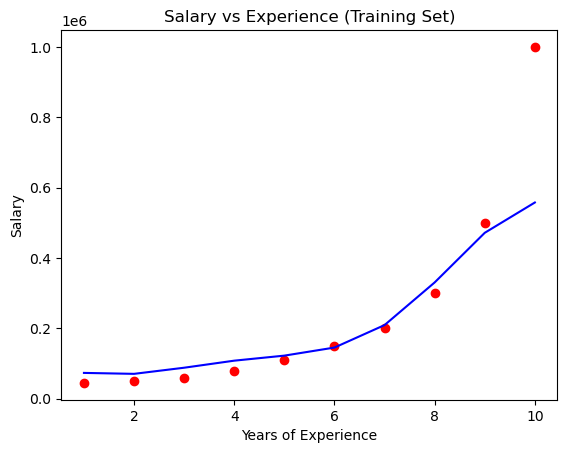

In [14]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y), color= 'red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue') # X is alerady scaled therefore replace only predict X not 6.5
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualizing the SVR results (for higher resolution and smoother curve)

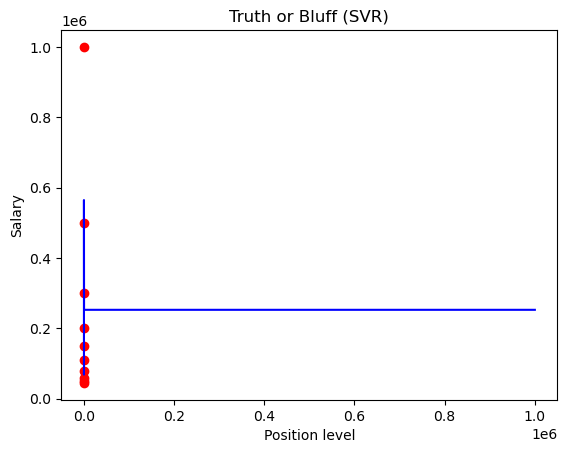

In [20]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
